In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv(r"E:\Data Analysis\Classification-project\notebooks\data\diabetes.csv")

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape,df.columns

((768, 9),
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
       dtype='object'))

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Here some columns contain minimum value 0 which is not right so we have to replace with median 

In [10]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df[ 'SkinThickness']=df[ 'SkinThickness'].replace(0,df[ 'SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df = df.drop_duplicates()

In [14]:
df.shape
df[df.duplicated(keep=False)]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<Axes: >

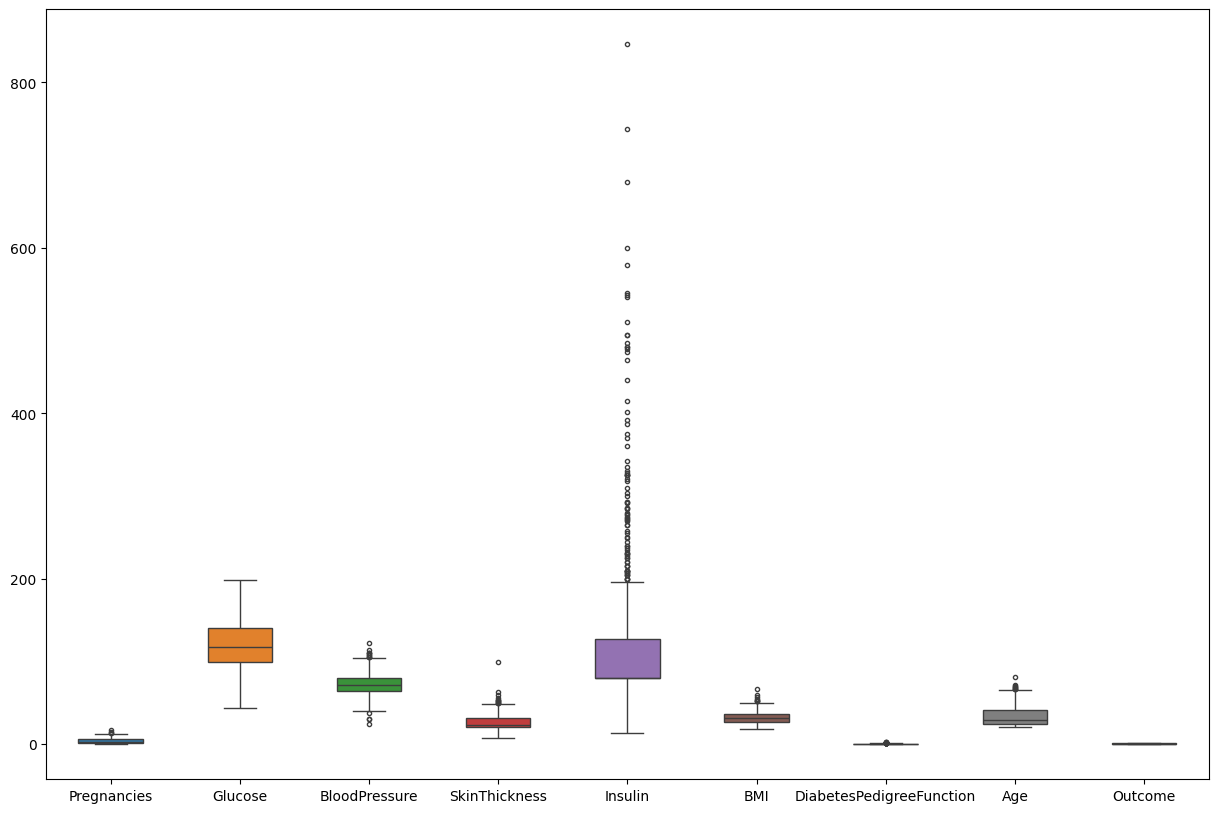

In [15]:

# visualize outlier with box plot
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)




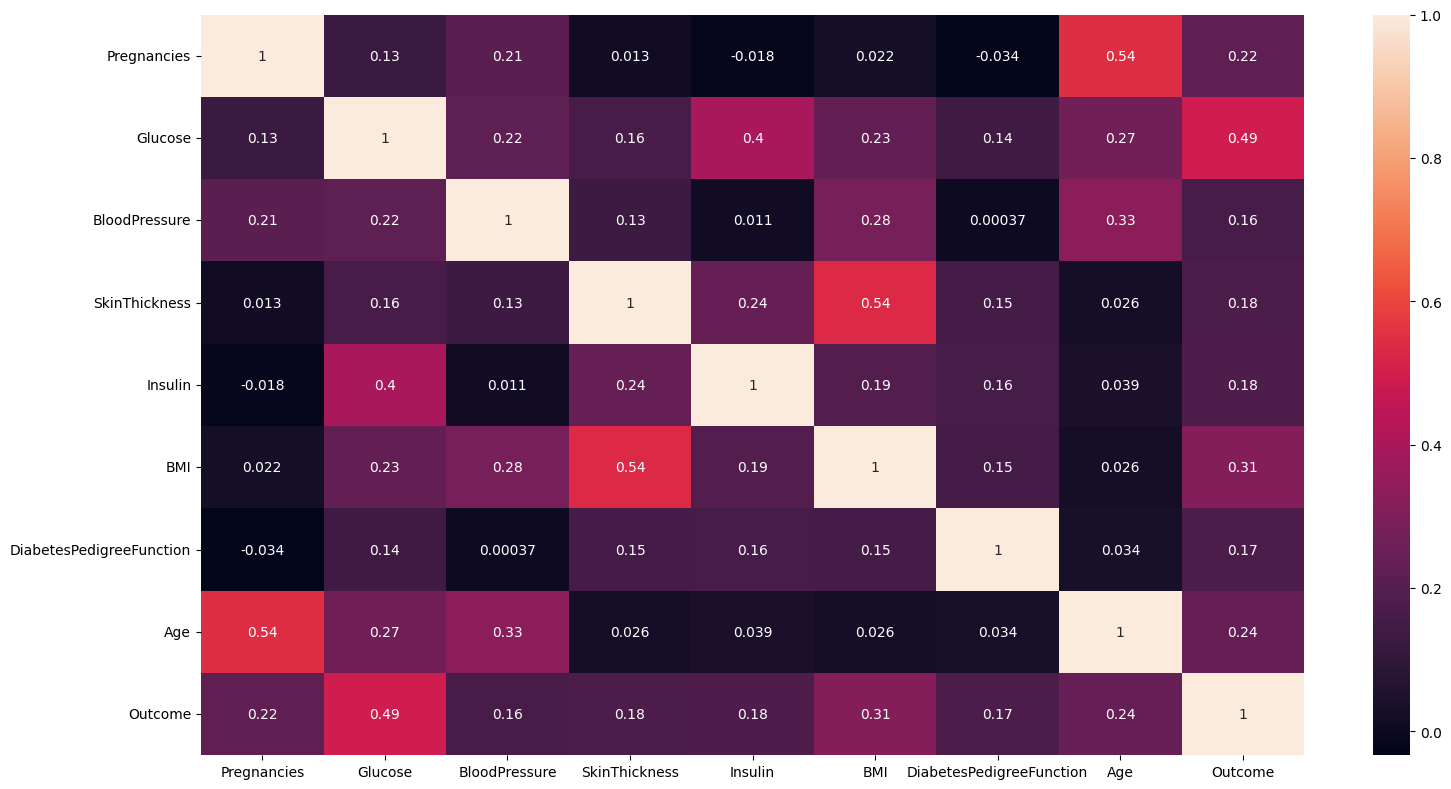

In [16]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

insulin is higher outliers so we can standard scaler for handle this

In [17]:
X=df.drop(columns=['Outcome'])
y=df['Outcome']

since there is no categorical features so no need to create these pipeline


In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [19]:
## segretting categorical and numerical columns
categorical_cols=X.select_dtypes(include='object').columns
numerical_cols=X.select_dtypes(exclude='object').columns

In [20]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder',OneHotEncoder()),
    ('scaler',StandardScaler(with_mean=False))
 
    ]
)

preprocessor=ColumnTransformer(
    [
        ('num_pipeline',num_pipeline,numerical_cols),
        ('cat_pipeline',cat_pipeline,categorical_cols)
    ],
   
)


In [21]:
models={
    'LogisticRegression':LogisticRegression(),
    'SVC':SVC(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'XGBClassifier':XGBClassifier(),
    'CatBoostClassifier':CatBoostClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'KNNClassifier':KNeighborsClassifier(),
    'GaussianNB':GaussianNB()
}

In [22]:
params = {

    'LogisticRegression': {
    'penalty':['l1','l2'],
    'C':np.logspace(-3,3,7),
    'solver':['newton-cg','lbfgs','liblinear'],
    
    },

    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    },

    'DecisionTree': {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
    }
    ,

    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },

    'XGBClassifier': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 6],
        'subsample': [0.8, 1.0]
    },

    'CatBoostClassifier': {
        'iterations': [200, 500],
        'learning_rate': [0.05, 0.1],
        'depth': [6, 8]
    },

    'AdaBoostClassifier': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1.0]
    },

    'GradientBoostingClassifier': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },

    'KNNClassifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        #'metric': ['euclidean', 'manhattan']
    },

    'GaussianNB': {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    }

}


In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
def evaluate_metrics(y_true, y_pred):
    return accuracy_score(y_true, y_pred)


def evaluate_model(X_train, y_train, X_test, y_test, models, param):
    report = {}

    for i in range(len(models)):
        model = list(models.values())[i]
        params = param[list(models.keys())[i]]

        gs = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1)
        gs.fit(X_train, y_train)

        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        y_test_pred = model.predict(X_test)

        score = evaluate_metrics(y_test, y_test_pred)
        report[list(models.keys())[i]] = score

    return report


In [25]:
model_report=evaluate_model(X_train,y_train,X_test,y_test,models,params)

0:	learn: 0.6620166	total: 154ms	remaining: 30.6s
1:	learn: 0.6400929	total: 162ms	remaining: 16.1s
2:	learn: 0.6186573	total: 170ms	remaining: 11.2s
3:	learn: 0.5979675	total: 178ms	remaining: 8.7s
4:	learn: 0.5818912	total: 185ms	remaining: 7.22s
5:	learn: 0.5660051	total: 193ms	remaining: 6.24s
6:	learn: 0.5496522	total: 201ms	remaining: 5.55s
7:	learn: 0.5336715	total: 207ms	remaining: 4.98s
8:	learn: 0.5177877	total: 213ms	remaining: 4.52s
9:	learn: 0.5072218	total: 218ms	remaining: 4.14s
10:	learn: 0.4933892	total: 223ms	remaining: 3.83s
11:	learn: 0.4813854	total: 227ms	remaining: 3.55s
12:	learn: 0.4742098	total: 230ms	remaining: 3.31s
13:	learn: 0.4656108	total: 233ms	remaining: 3.1s
14:	learn: 0.4562998	total: 237ms	remaining: 2.92s
15:	learn: 0.4484768	total: 240ms	remaining: 2.76s
16:	learn: 0.4420261	total: 243ms	remaining: 2.62s
17:	learn: 0.4341705	total: 247ms	remaining: 2.49s
18:	learn: 0.4278527	total: 250ms	remaining: 2.38s
19:	learn: 0.4220730	total: 253ms	remaining

In [26]:
model_report

{'LogisticRegression': 0.7792207792207793,
 'SVC': 0.7597402597402597,
 'DecisionTree': 0.7142857142857143,
 'RandomForest': 0.7532467532467533,
 'XGBClassifier': 0.7597402597402597,
 'CatBoostClassifier': 0.7597402597402597,
 'AdaBoostClassifier': 0.7792207792207793,
 'GradientBoostingClassifier': 0.7727272727272727,
 'KNNClassifier': 0.7142857142857143,
 'GaussianNB': 0.7532467532467533}

In [27]:

best_model_score=max(sorted(model_report.values()))
best_model_name=list(model_report.keys())[list(model_report.values()).index(best_model_score)]
best_model=models[best_model_name]

In [28]:
best_model,best_model_name,best_model_score

(LogisticRegression(C=np.float64(1.0)),
 'LogisticRegression',
 0.7792207792207793)

In [29]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

# best model already selected by you
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, average="weighted"),
    "recall": recall_score(y_test, y_pred, average="weighted"),
    "f1_score": f1_score(y_test, y_pred, average="weighted"),
    "confusion_matrix": confusion_matrix(y_test, y_pred)
}

print(f"Best Model : {best_model_name}")
print("Accuracy :", metrics["accuracy"])
print("Precision:", metrics["precision"])
print("Recall   :", metrics["recall"])
print("F1-score :", metrics["f1_score"])
print("\nConfusion Matrix:\n", metrics["confusion_matrix"])

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Best Model : LogisticRegression
Accuracy : 0.7792207792207793
Precision: 0.7763726849963286
Recall   : 0.7792207792207793
F1-score : 0.7772410664247017

Confusion Matrix:
 [[84 15]
 [19 36]]

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154

